# Fitnesso : Fitness Score Predictor and AI Dietician
A user-friendly predictive model designed using various machine leaning algorithms, that will predict a fitness score according to which chances of diseases will be predicted and a diet plan will be provided 
by using artificial intelligence.


## Diabetes Prediction Model

### Importing Libraries and Dataset

Let's first import all the required libraries we are going to use in this model.
<br>
1) Scientific Computing Libraries :  Numpy(Data Structures & Tools) and Pandas(Array and Matrix)
<br>
2) Visualization Libraries : Matplotlib(Plot & Graph) and Seaborn(Heap Maps & Time Series)
<br>
3) ML and DL Libraries : ScikitLearn(Machine Learning) and Keras(Deep Learning)


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Now, let's mount our drive so that we can access the dataset to train our model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Fitnesso: Fitness Score Predictor and AI Dietician
- A user-friendly predictive model designed using various machine leaning algorithms, that will predict a fitness score according to which chances of various diseases will be predicted and a diet plan will be provided by using artificial intelligence.
- Here, we'll be developing three different model for diabetes, obesity and heart disease.

Reading the csv file using pandas library and putting it into a dataframe.

In [ ]:
diab_data = pd.read_csv('/content/drive/MyDrive/Project/diabetes.csv')

# Exploratory Data Analysis
- Summarize main characterstics of data.
- give better understanding of data.
- uncover relationship between different variables.
- extract import variables.

Let's see first five rows of the dataframe using head function.

In [ ]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diab_data.shape

(768, 9)

In [ ]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
diab_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Dataset Observations:
- There are a total number of 768 rows and 9 columns which represent records and features in the dataset.
- Each feature can be either of integer or float dataype.
- Some features like Glucose, Blood pressure, Insulin, BMI have zero values which represent missing data.
- There are no NaN values in the dataset.
- In the outcome column, 0 means Diabetes negative and 1 means Diabetes positive.

# Data Visualization
Before going further it's important to visual our data and get some more understanding of it.

Let's visualize the outcome first.

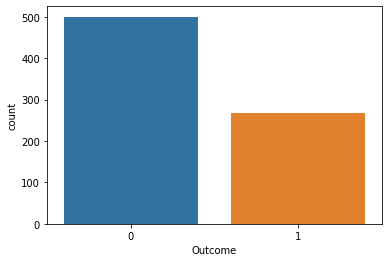

In [ ]:
sns.countplot(x = 'Outcome', data = diab_data)

<function matplotlib.pyplot.show(*args, **kw)>

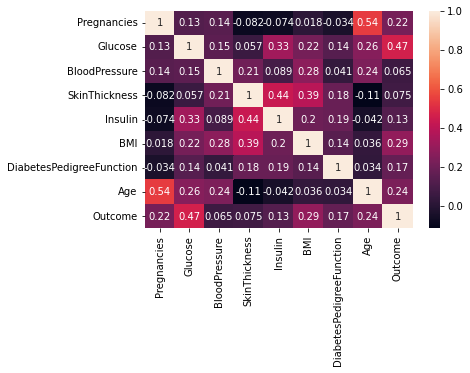

In [ ]:
sns.heatmap(diab_data.corr(), annot = True)
plt.show

### From the above visualization it can be said that:
- Countplot shows us the dataset is imbalanced between the patients with diabetes and patients with no diabetes.
- Correlation heatmap shows us that the "Outcome" is highly correlated with Glucose, BMI, Insulin and Age. so, these features can be used as input to predict the outcome.
- Less features will not provide accurate results so here we'll be taking all the features to predict the target variables.

# Data Preprocessing

Now, let's move forward and Pre-Process the dataset such that it can be used to predict a accurate outcome.

In [ ]:
new_diab_data = diab_data

In [ ]:
new_diab_data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = new_diab_data[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 


In [ ]:
new_diab_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
new_diab_data["Glucose"].fillna(new_diab_data["Glucose"].mean(), inplace = True)
new_diab_data["BloodPressure"].fillna(new_diab_data["BloodPressure"].mean(), inplace = True)
new_diab_data["SkinThickness"].fillna(new_diab_data["SkinThickness"].mean(), inplace = True)
new_diab_data["Insulin"].fillna(new_diab_data["Insulin"].mean(), inplace = True)
new_diab_data["BMI"].fillna(new_diab_data["BMI"].mean(), inplace = True)

In [ ]:
new_diab_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
new_diab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [ ]:
new_diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [ ]:
Y = new_diab_data['Outcome']
X = new_diab_data.drop('Outcome', axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


- Spilting data set is an important part before testing and training the dataset.
- So, let's split the dataframe into "Training Set" i.e 80% of the overall Dataset for trainning and "Testing Set" i.e 20% of overall Dataset for testing.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=0)

# Data Modelling
- A Model is used to relate one or more independent variable to dependent variables.
-After applying all the different model, Logestic Regression was giving the highest acccuracy.

In [ ]:
lr_diabetes = LogisticRegression(max_iter = 1000, random_state = 42)
lr_diabetes.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
Y_test_predicted = lr_diabetes.predict(X_test)

In [ ]:
lr_diabetes.classes_

array([0, 1])

In [ ]:
accuracy_score(Y_test, Y_test_predicted)

0.8051948051948052

Let's check our model by giving some input from the dataset.

In [ ]:
X_test1 = [[6,148,72,35,155.54,33.6,0.627,50]]
if(lr_diabetes.predict(X_test1)==0):
  print("The Pateint is Non-Diabetic.")
else:
  print("The Pateint is Diabetic.")
diabetes_result = lr_diabetes.predict(X_test1)

The Pateint is Diabetic.


In [ ]:
X_test2 = [[1,85,66,29,155.54,26.6,0.351,31]]
if(lr_diabetes.predict(X_test2)==0):
  print("The Pateint is Non-Diabetic.")
else:
  print("The Pateint is Diabetic.")
diabetes_result2=(lr_diabetes.predict(X_test2))

The Pateint is Non-Diabetic.


- Our model is working fine and giving accurate results for given features taken from the given dataset.

## Heart Disease Prediction Model
- Libraries are already imported above so let's import the dataset into the dataframe and start builing the model.

In [ ]:
heart_data = pd.read_csv('/content/drive/MyDrive/Project/heart_cleveland_upload.csv')

In [ ]:
heart_data.shape

(297, 14)

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


### Data Visualization
- Let's do some visualization to understand the dataset more.

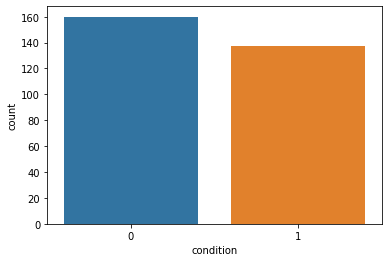

In [ ]:
sns.countplot(x = 'condition', data = heart_data)

In [ ]:
target_temp = heart_data.condition.value_counts()
print("Percentage of patience without Heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with Heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without Heart problems: 52.81
Percentage of patience with Heart problems: 45.21


### Data Preprocessing

- Just, let drop out the target variable i.e "condition", because there is no use of it in training the model.

In [ ]:
Y1 = heart_data['condition']
X1 = heart_data.drop('condition', axis = 1)
X1.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2


The given dataset is already well processed, so we can test and train the dataset without changing.

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.20, random_state=0)

## Data Modelling
- Using Random Forset Classifier is best here, because of it's accuracy. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(300):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X1_train,Y1_train)
    Y_pred_rf = rf.predict(X1_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y1_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X1_train,Y1_train)
Y_pred_rf = rf.predict(X1_test)

Let's check our model by giving some input from the dataset.

In [ ]:
X1_test1 = [[65,1,0,138,282,1,2,174,0,1.4,1,1,0]]
if(rf.predict(X1_test1)==0):
  print("The Pateint has no chance of heart disease.")
else:
  print("The Pateint has high chance of heart disease.")
#heart_result = rf.predict(X1_test1)

The Pateint has high chance of heart disease.


In [ ]:
X1_test2 = [[69,1,0,160,234,1,2,131,0,0.1,1,1,0]]
if(rf.predict(X1_test2)==0):
  print("The Pateint has no chance of heart disease.")
else:
  print("The Pateint has high chance of heart disease.")
heart_result = rf.predict(X1_test2)

The Pateint has no chance of heart disease.


## Obesity Prediction Model

In [ ]:
obesity_data = pd.read_csv('/content/drive/MyDrive/Project/csv_result-ObesityDataSet_raw_and_data_sinthetic.csv', on_bad_lines = 'skip')
obesity_data.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,2,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,5,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,6,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,7,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,8,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,9,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,10,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


### Data Preprocessing

This dataset definetly need to be Pre-Processed before fitting into the model and used for trainning and testing.

In [ ]:
obesity_data.shape

(2111, 18)

In [ ]:
columns = ["FCVC", "NCP", "CH2O", "TUE", "FAF"]
for col in columns:
    #round to nearest whole number
    obesity_data[col] = round(obesity_data[col]).astype('int') 

In [ ]:
obesity_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,2,Female,21.0,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,3,Male,23.0,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,4,Male,27.0,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,5,Male,22.0,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
cleanup_nums = {"Gender": {"Male": 0, "Female": 1},
                  "family_history_with_overweight": {"yes": 1, "no":0},
                  "FAVC": {"yes": 1, "no":0},
                  "CAEC" : {"Sometimes" : 1, "Always" : 3, "no":0,"Frequently":2},
                  "SMOKE": {"yes": 1, "no":0},
                  "SCC": {"yes": 1, "no":0},
                  "CALC" : {"Sometimes" : 1, "Always" : 3, "no":0,"Frequently":2},
                  "MTRANS" : {"Walking" :1,"Automobile" :0,"Public_Transportation" :0,"Motorbike" :0, "Bike":0},
                  "NObeyesdad": {"Insufficient_Weight":0,
                                  "Normal_Weight":1, "Overweight_Level_I":2, "Overweight_Level_II":3,"Obesity_Type_I":4, "Obesity_Type_II" : 5, "Obesity_Type_III":6}
                }

In [ ]:
obesity_data.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                                int64
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                                int64
SCC                                object
FAF                                 int64
TUE                                 int64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
obesity_data = obesity_data.replace(cleanup_nums)

In [ ]:
obesity_data.dtypes

id                                  int64
Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                                int64
NCP                                 int64
CAEC                                int64
SMOKE                               int64
CH2O                                int64
SCC                                 int64
FAF                                 int64
TUE                                 int64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object

In [ ]:
obesity_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,1,21.0,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,0,1
1,2,1,21.0,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,0,1
2,3,0,23.0,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,0,1
3,4,0,27.0,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,1,2
4,5,0,22.0,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,0,3


In [ ]:
obesity_data.drop('id', axis = 1, inplace = True)

In [ ]:
obesity_data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Let's remove the target variable from the given dataset and fit it for output variable.

In [ ]:
Y2 = obesity_data['NObeyesdad']
X2 = obesity_data.drop('NObeyesdad', axis = 1)

X2.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,21.0,1.62,64.0,1,0,2,3,1,0,2,0,0,1,0,0
1,1,21.0,1.52,56.0,1,0,3,3,1,1,3,1,3,0,1,0
2,0,23.0,1.80,77.0,1,0,2,3,1,0,2,0,2,1,2,0
3,0,27.0,1.80,87.0,0,0,3,3,1,0,2,0,2,0,2,1
4,0,22.0,1.78,89.8,0,0,2,1,1,0,2,0,0,0,1,0
5,0,29.0,1.62,53.0,0,1,2,3,1,0,2,0,0,0,1,0
6,1,23.0,1.50,55.0,1,1,3,3,1,0,2,0,1,0,1,0
7,0,22.0,1.64,53.0,0,0,2,3,1,0,2,0,3,0,1,0
8,0,24.0,1.78,64.0,1,1,3,3,1,0,2,0,1,1,2,0
9,0,22.0,1.72,68.0,1,1,2,3,1,0,2,0,1,1,0,0


### Data Modelling
- Linear Regression will be used again due to it's high accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X2_train, X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.15)
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_obesity = LogisticRegression()
lr_obesity.fit(X2_train,Y2_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y2_pred = lr_obesity.predict(X2_test)
cm=confusion_matrix(Y2_test,Y2_pred)
print("The Accuracy of the Model is: ", round(accuracy_score(Y2_test, Y2_pred)*100,2))

The Accuracy of the Model is:  87.38


In [ ]:
X2_test1 = [[1,21,1.62,64,1,0,2,3,1,0,2,0,0,1,0,0]]
lr_obesity.predict(X2_test1)
obesity_result = lr_obesity.predict(X2_test1)/7
obesity_result

array([0.71428571])

# Fitness Score
- Let's use above all the models to generate a equation and predict a fitness score according to which a user will know different chances of having different diseases.
- the fitness score scale is from 0 to 10.

In [ ]:
fitness_score = (((1*heart_result) + (2*diabetes_result) + (3*obesity_result))/6)*10
fitness_score


array([6.9047619])